In [2]:
import pandas as pd
from os import path, listdir
from pathlib import Path
import proc_model
import matplotlib.pyplot as plt

In [3]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#pForward and pTurn

In [24]:
data_dir = path.join(path.dirname(proc_model.__file__), 'outputs')
home = str(Path.home())
output_dir = path.join(home, 'Documents', 'bachelor', 'article', 'pm_results')
input_files = listdir(data_dir)
SAVE = False

In [25]:
# function to parse parameters' values from experiment name
def get_pf(name):
    return int(name.split('_')[3])
   

def get_pt(name):
    return int(name.split('_')[4])

In [26]:
#read dataframe
filename = [f for f in input_files if 'probs' in f][0]
df = pd.read_csv(path.join(data_dir, filename))
df['pForward'] = df['city'].apply(get_pf)
df['pTurn'] = df['city'].apply(get_pt)
df = df[df.pForward >= 80]



##1. Probability of a turn (right and left) 

In [27]:
values = [i for i in set(df.pForward)]
x_col = 'pTurn'

###1.2 Node density

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


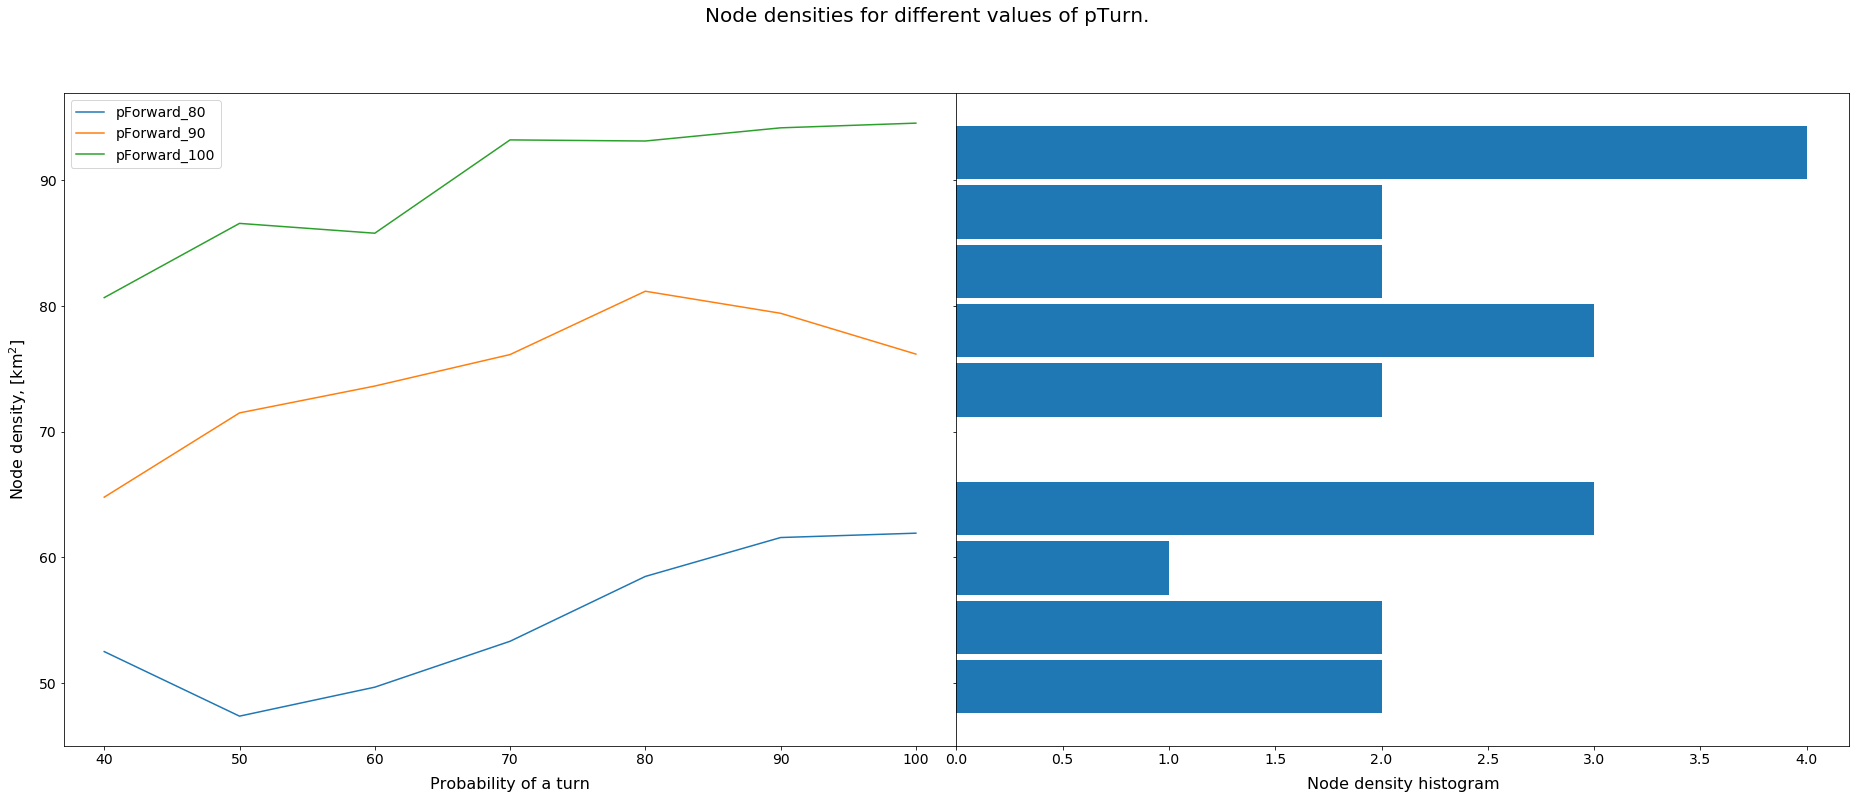

In [28]:
label = 'node_density_km'

fig, axes = plt.subplots(ncols=2, sharey=True,  figsize=(32, 12))
plt.suptitle('Node densities for different values of pTurn.')

ax = axes[0]
for val in values:
    df_ = df[df.pForward == val]
    df_.plot(kind='line', x=x_col, y=label, label='pForward_%s' % val, ax=ax)


ax.set_xlabel('Probability of a turn', labelpad=10)
ax.set_ylabel('Node density, [km$^2$]', labelpad=10)
ax.legend(loc=2)
ax = axes[1]
df[[label]].plot(kind='hist',rwidth=0.9, ax=ax, orientation='horizontal')
ax.set_xlabel('Node density histogram', labelpad=10)
ax.get_legend().remove()
plt.subplots_adjust(wspace=0)

if SAVE:
    plt.savefig(path.join(output_dir, 'pTurn_density.eps'), bbox_inches='tight')


###1.2 Node degree

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


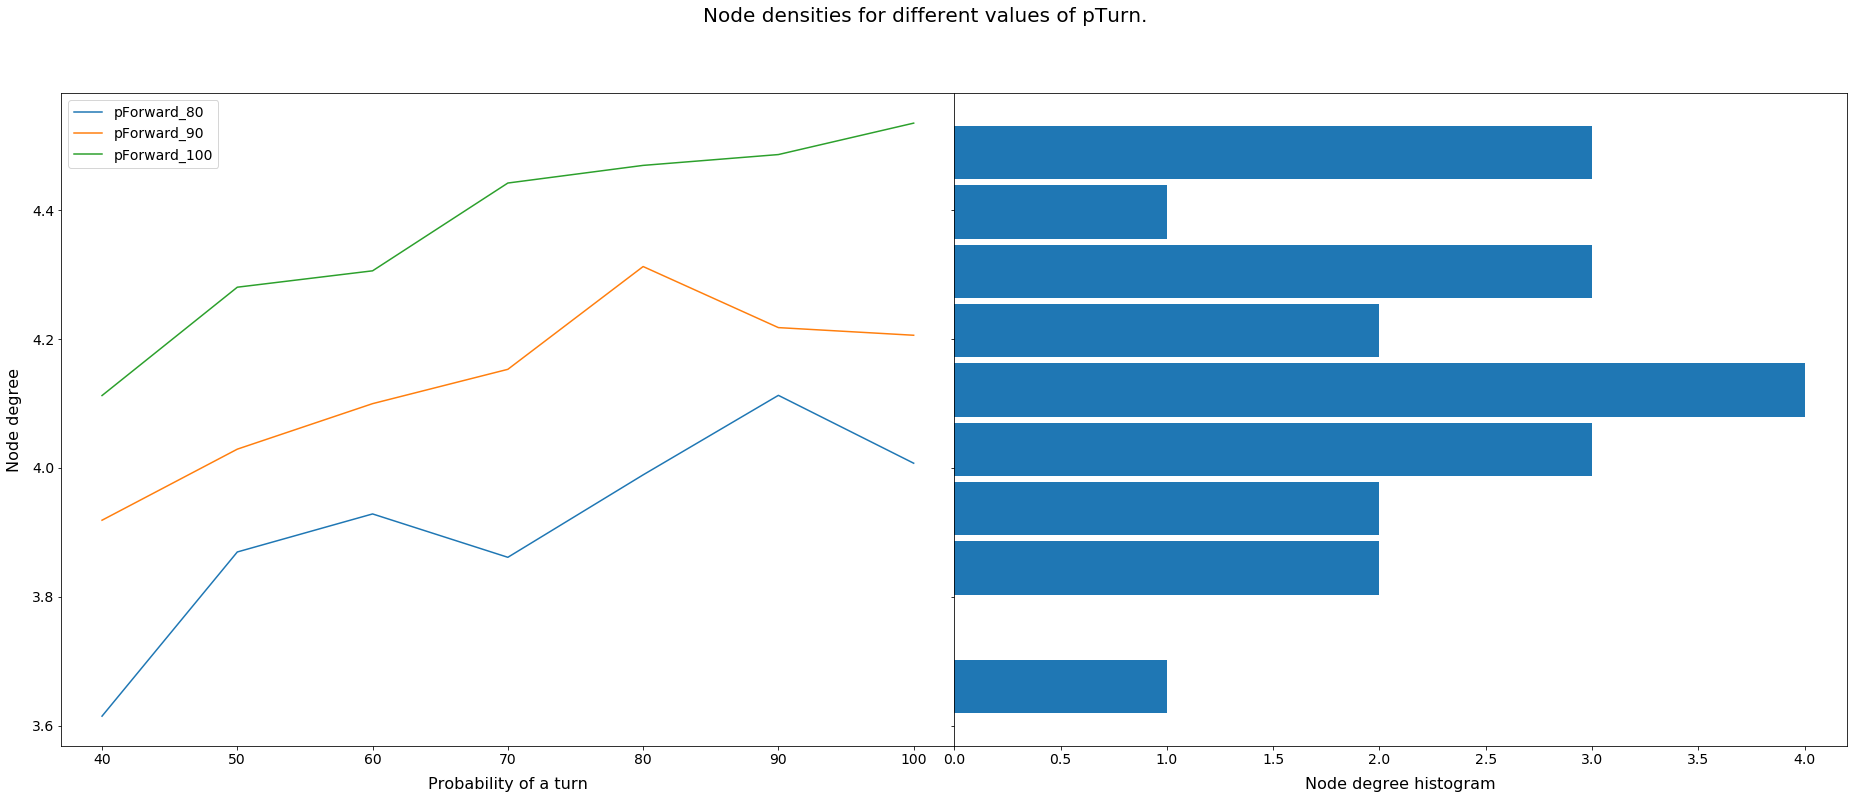

In [29]:
label = 'degree_avg'

fig, axes = plt.subplots(ncols=2, sharey=True,  figsize=(32, 12))
plt.suptitle('Node densities for different values of pTurn.')

ax = axes[0]
for val in values:
    df_ = df[df.pForward == val]
    df_.plot(kind='line', x=x_col, y=label, label='pForward_%s' % val, ax=ax)


ax.set_xlabel('Probability of a turn', labelpad=10)
ax.set_ylabel('Node degree', labelpad=10)
ax.legend(loc=2)

ax = axes[1]
df[[label]].plot(kind='hist',rwidth=0.9, ax=ax, orientation='horizontal')
ax.set_xlabel('Node degree histogram', labelpad=10)
ax.get_legend().remove()
plt.subplots_adjust(wspace=0)

if SAVE:
    plt.savefig(path.join(output_dir, 'pTurn_degree.eps'), bbox_inches='tight')


###1.3 Node and edge count

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


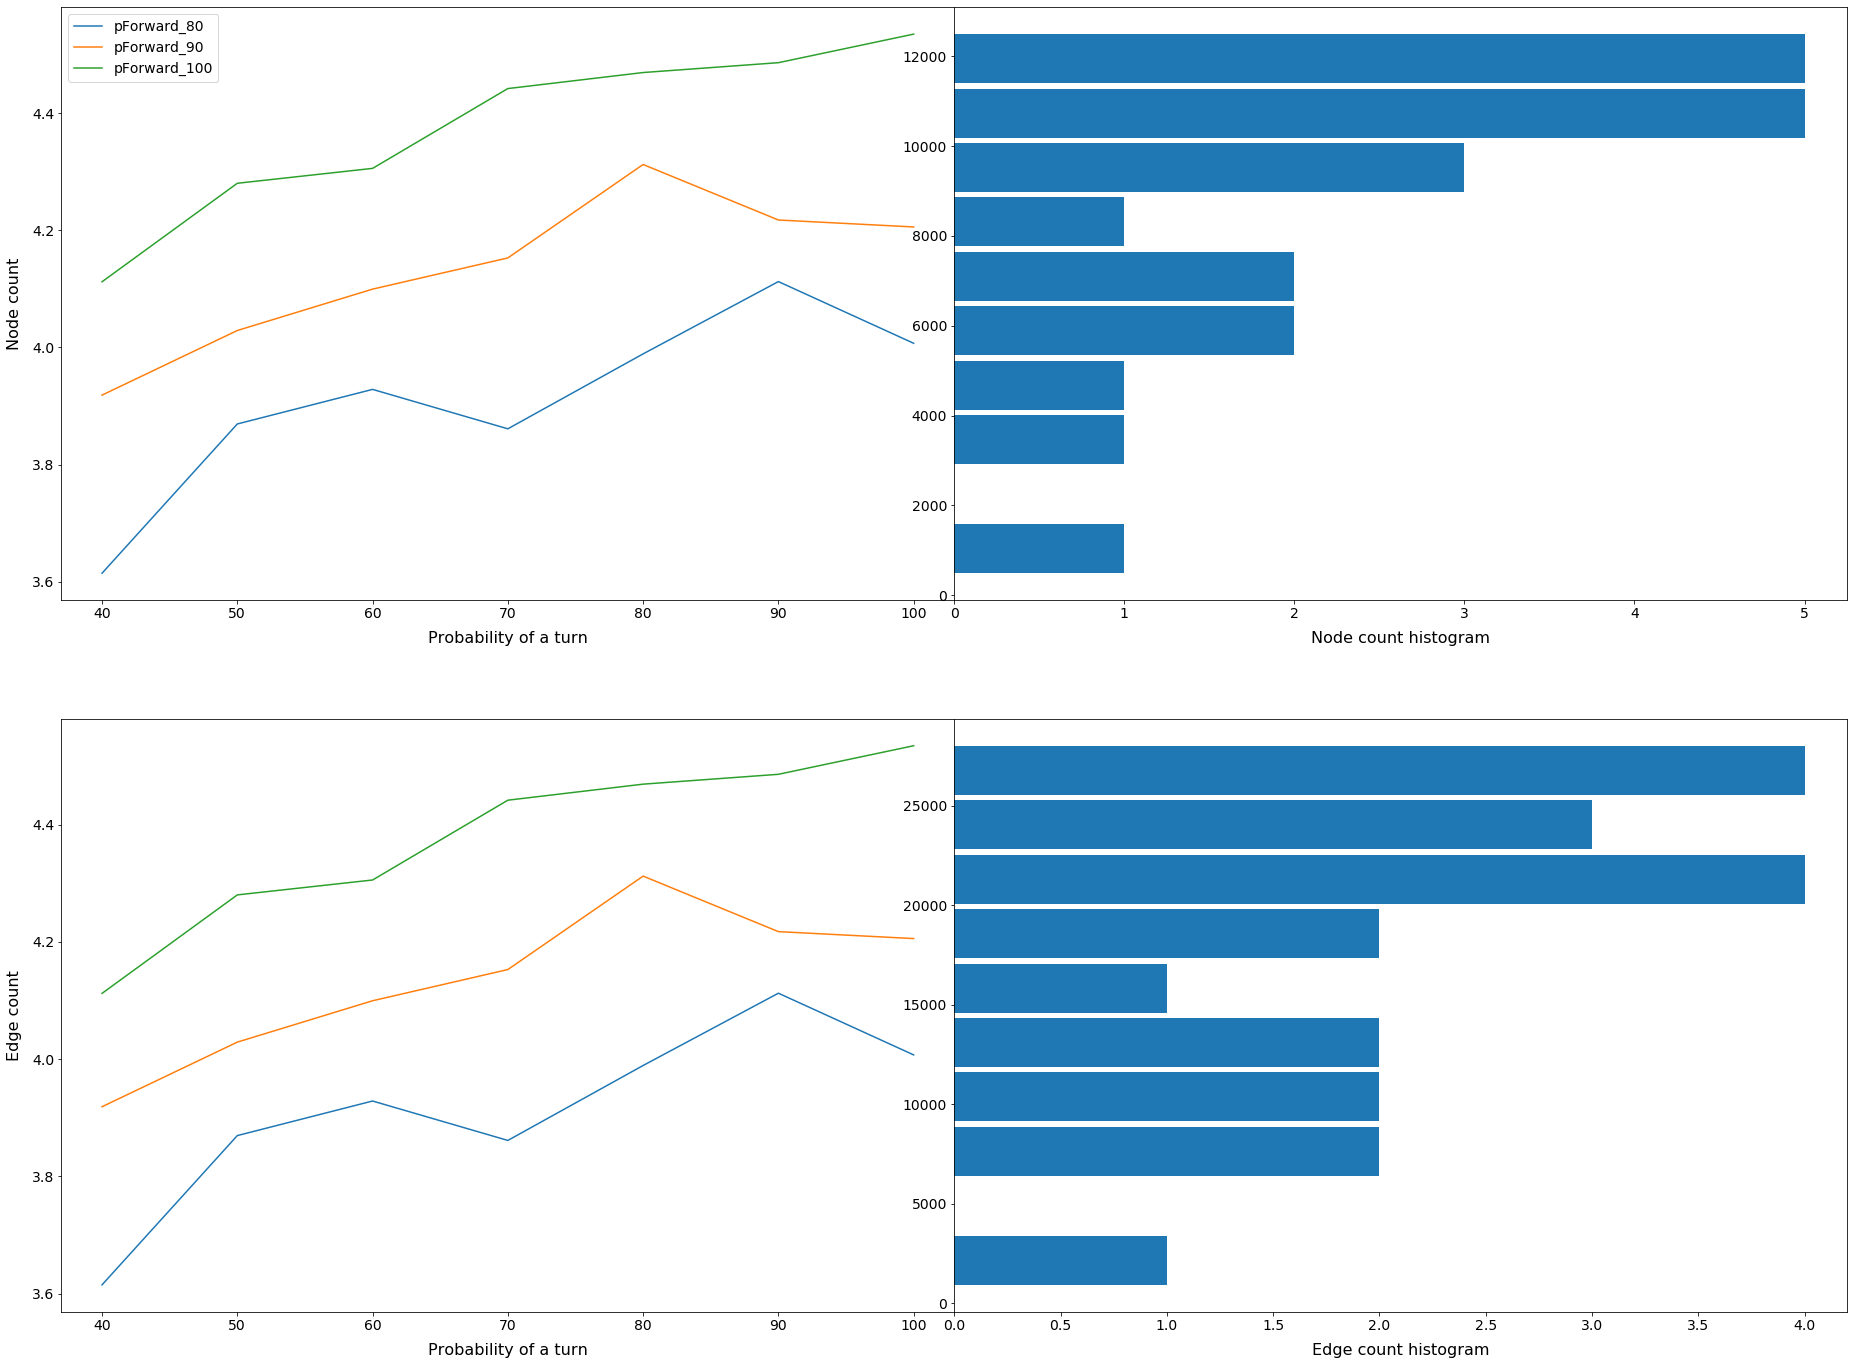

In [30]:
label1, label2 = 'num_nodes','num_edges'

fig, axes = plt.subplots(nrows=2, ncols=2,   figsize=(32, 24))

ax = axes[0][0]
for val in values:
    df_ = df[df.pForward == val]
    df_.plot(kind='line', x=x_col, y=label, label='pForward_%s' % val, ax=ax)

ax.set_xlabel('Probability of a turn', labelpad=10)
ax.set_ylabel('Node count', labelpad=10)
ax.legend(loc=2)
ax = axes[0][1]
df[[label1]].plot(kind='hist',rwidth=0.9,  ax=ax, orientation='horizontal')
ax.get_legend().remove()
ax.set_xlabel('Node count histogram', labelpad=10)

ax = axes[1][0]
for val in values:
    df_ = df[df.pForward == val]
    df_.plot(kind='line', x=x_col, y=label, label='pForward_%s' % val, ax=ax)

ax.set_xlabel('Probability of a turn', labelpad=10)
ax.set_ylabel('Edge count', labelpad=10)
ax.get_legend().remove()
ax = axes[1][1]
df[[label2]].plot(kind='hist',rwidth=0.9,  ax=ax, orientation='horizontal')
ax.get_legend().remove()
ax.set_xlabel('Edge count histogram', labelpad=10)
plt.subplots_adjust(wspace=0)

if SAVE:
    plt.savefig(path.join(output_dir, 'pTurn_counts.eps'), bbox_inches='tight')

##2. Probability of a road continuing forward

In [31]:
values = [i for i in set(df.pTurn)]
print(values)
x_col = 'pForward'

[100, 70, 40, 80, 50, 90, 60]


###2.1 Node density

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


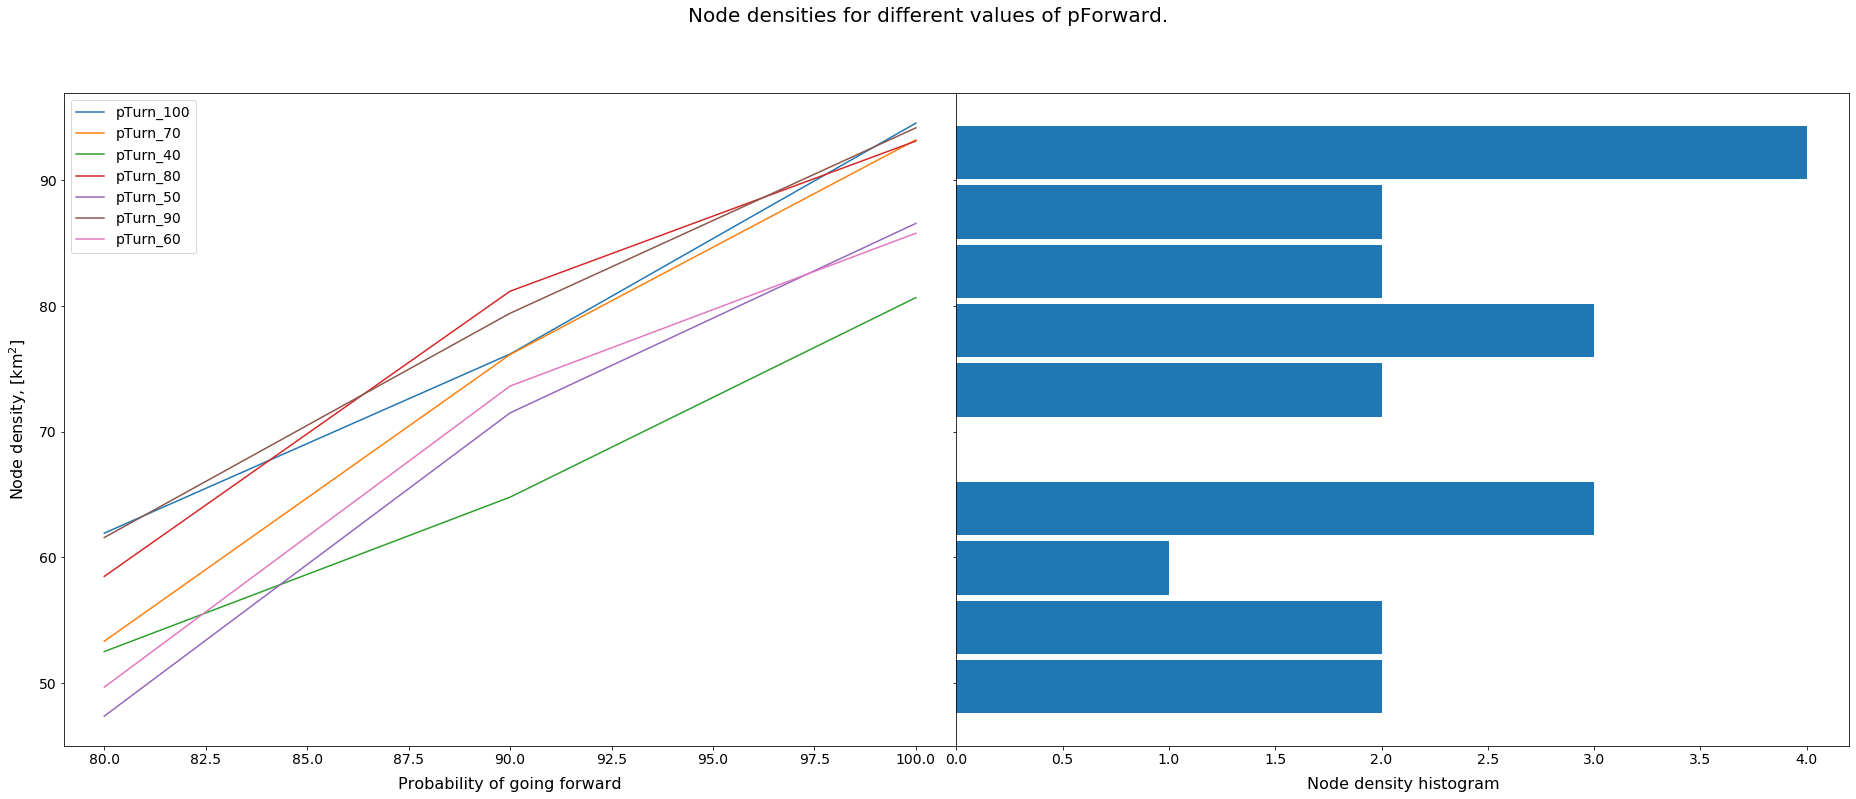

In [32]:
label = 'node_density_km'

fig, axes = plt.subplots(ncols=2, sharey=True,  figsize=(32, 12))
plt.suptitle('Node densities for different values of pForward.')

ax = axes[0]
for val in values:
    df_ = df[df.pTurn == val]
    df_.plot(kind='line', x=x_col, y=label, label='pTurn_%s' % val, ax=ax)


ax.set_xlabel('Probability of going forward', labelpad=10)
ax.set_ylabel('Node density, [km$^2$]', labelpad=10)
ax.legend(loc=2)
ax = axes[1]
df[[label]].plot(kind='hist',rwidth=0.9, ax=ax, orientation='horizontal')
ax.set_xlabel('Node density histogram', labelpad=10)
ax.get_legend().remove()
plt.subplots_adjust(wspace=0)

if SAVE:
    plt.savefig(path.join(output_dir, 'pForward_density.eps'), bbox_inches='tight')


###2.2 Node degree

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


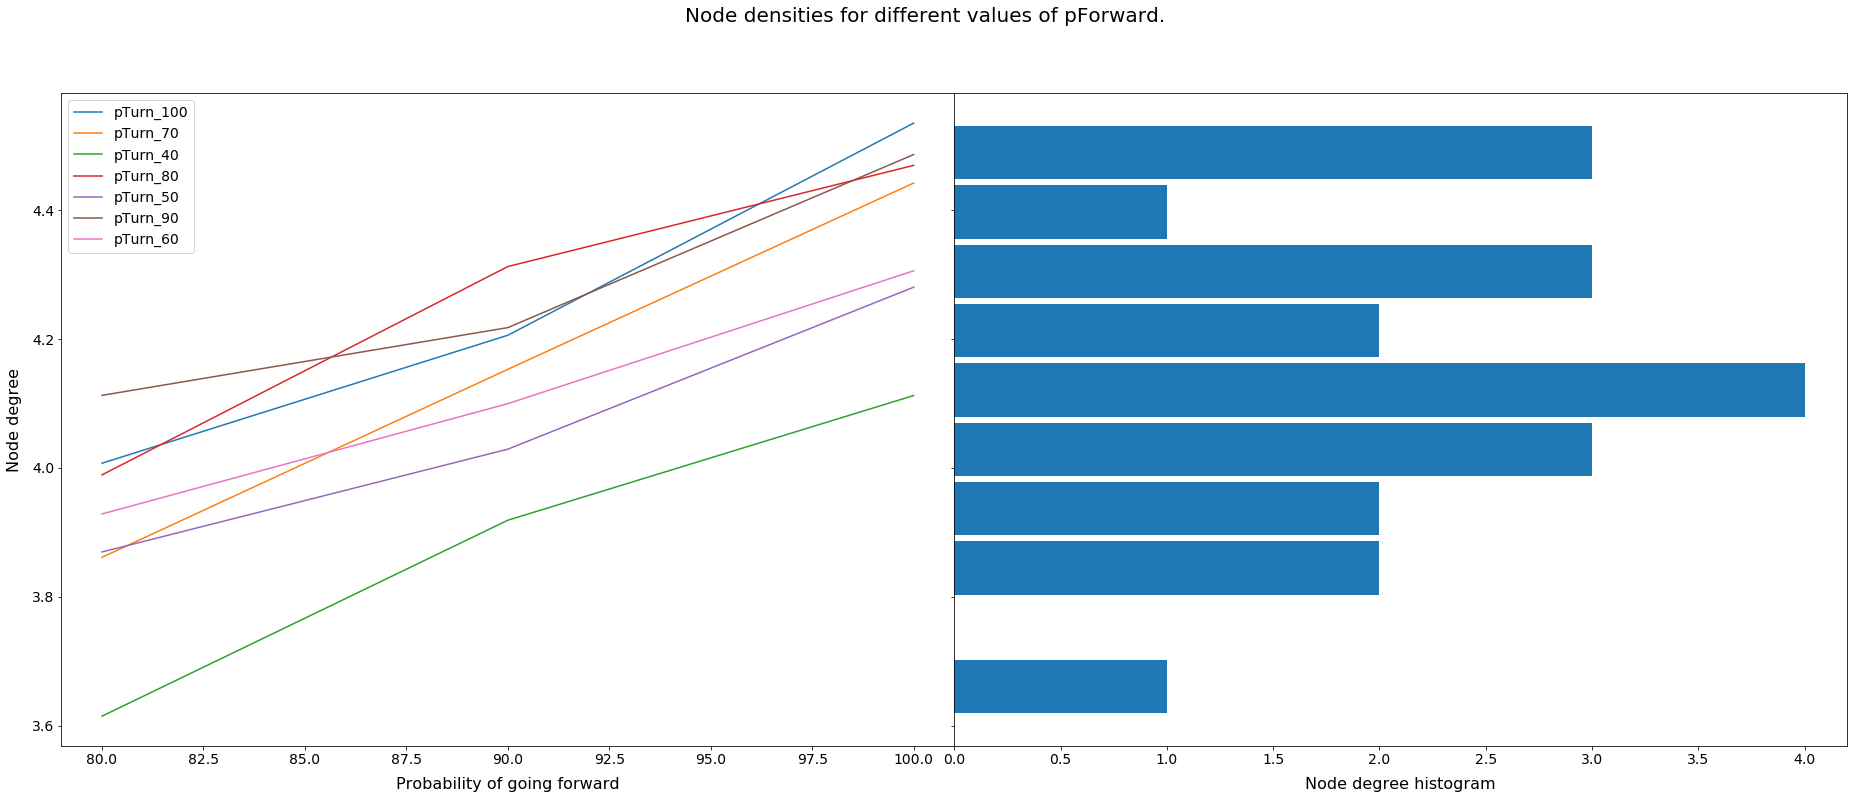

In [33]:
label = 'degree_avg'

fig, axes = plt.subplots(ncols=2, sharey=True,  figsize=(32, 12))
plt.suptitle('Node densities for different values of pForward.')

ax = axes[0]
for val in values:
    df_ = df[df.pTurn == val]
    df_.plot(kind='line', x=x_col, y=label, label='pTurn_%s' % val, ax=ax)


ax.set_xlabel('Probability of going forward', labelpad=10)
ax.set_ylabel('Node degree', labelpad=10)
ax.legend(loc=2)

ax = axes[1]
df[[label]].plot(kind='hist',rwidth=0.9, ax=ax, orientation='horizontal')
ax.set_xlabel('Node degree histogram', labelpad=10)
ax.get_legend().remove()
plt.subplots_adjust(wspace=0)

if SAVE:
    plt.savefig(path.join(output_dir, 'pForward_degree.eps'), bbox_inches='tight')


###2.3 Node and edge count

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


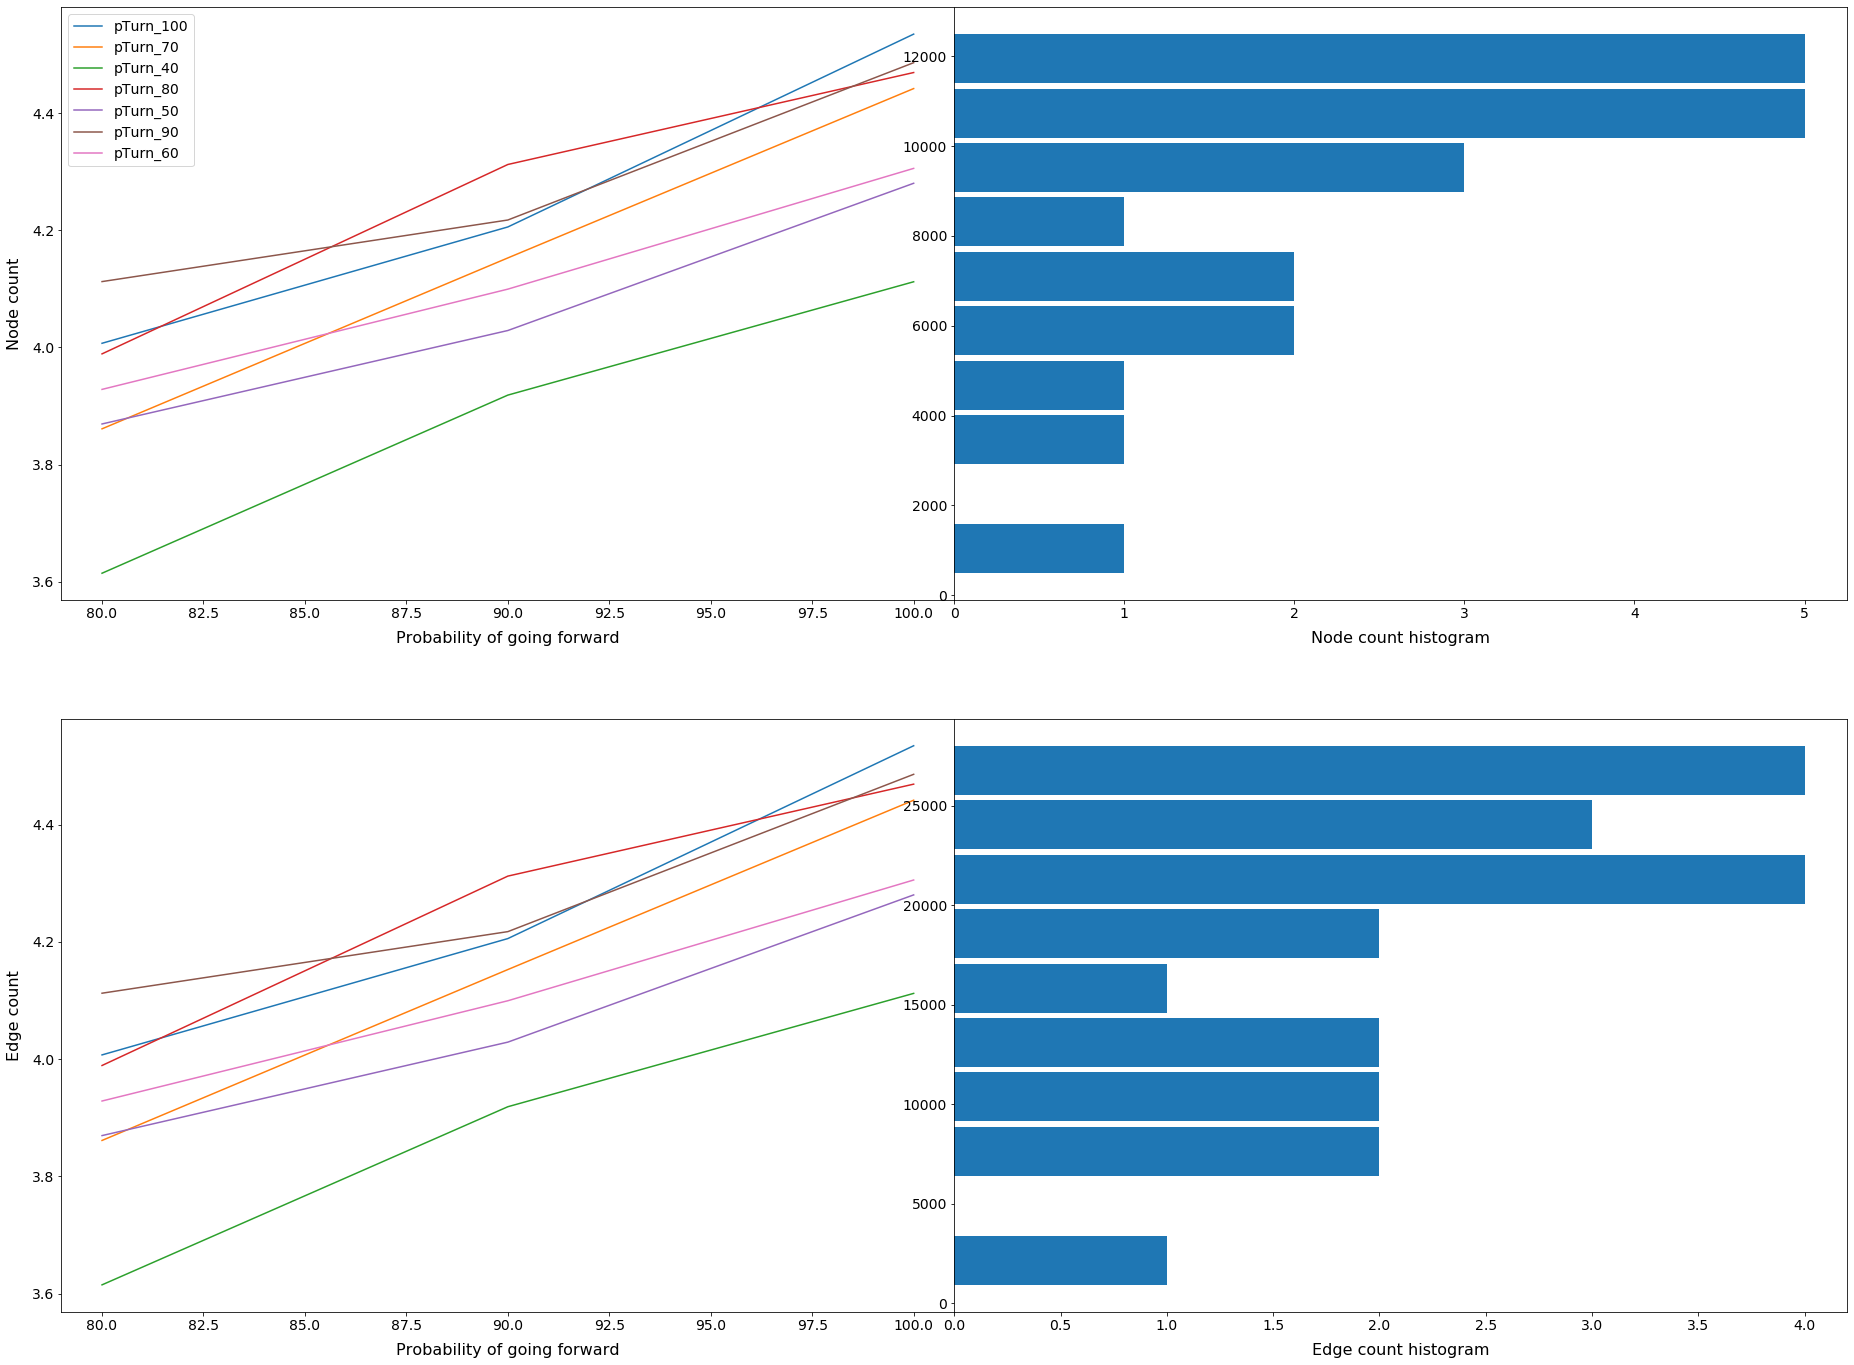

In [34]:
label1, label2 = 'num_nodes','num_edges'

fig, axes = plt.subplots(nrows=2, ncols=2,   figsize=(32, 24))

ax = axes[0][0]
for val in values:
    df_ = df[df.pTurn == val]
    df_.plot(kind='line', x=x_col, y=label, label='pTurn_%s' % val, ax=ax)

ax.set_xlabel('Probability of going forward', labelpad=10)
ax.set_ylabel('Node count', labelpad=10)
ax.legend(loc=2)
ax = axes[0][1]
df[[label1]].plot(kind='hist',rwidth=0.9,  ax=ax, orientation='horizontal')
ax.get_legend().remove()
ax.set_xlabel('Node count histogram', labelpad=10)

ax = axes[1][0]
for val in values:
    df_ = df[df.pTurn == val]
    df_.plot(kind='line', x=x_col, y=label, label='pTurn_%s' % val, ax=ax)

ax.set_xlabel('Probability of going forward', labelpad=10)
ax.set_ylabel('Edge count', labelpad=10)
ax.get_legend().remove()
ax = axes[1][1]
df[[label2]].plot(kind='hist',rwidth=0.9,  ax=ax, orientation='horizontal')
ax.get_legend().remove()
ax.set_xlabel('Edge count histogram', labelpad=10)
plt.subplots_adjust(wspace=0)

if SAVE:
    plt.savefig(path.join(output_dir, 'pForward_counts.eps'), bbox_inches='tight')